In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from fastai.vision.all import *
from pathlib import Path


import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [3]:

#Loading the data
DATA = untar_data(URLs.PETS)
DATA.ls()



(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
path = Path('/root/.fastai/data/oxford-iiit-pet/images')

In [5]:
#Simple function to get correct labels
#Pets stored as name_number.jpg
#removing number and .jpg
def pet_label_func(fn):
    x_split = fn.split("_")
    if len(x_split) == 2:
        return x_split[0]
    else:
        label = ""
        for i in range(len(x_split) - 2):
            label += x_split[i] + " "
        label += x_split[-2]
        return label
    


In [6]:
pad_dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2,
    label_func=pet_label_func, item_tfms=[Resize(80, method='pad')])


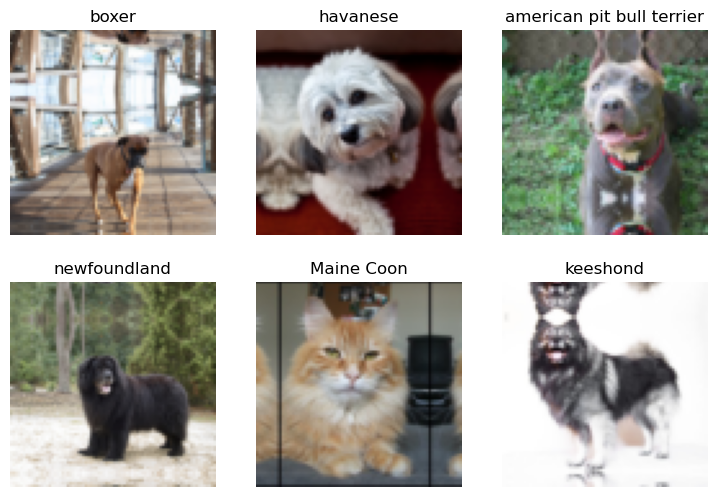

In [7]:
pad_dls.show_batch(max_n=6)

In [8]:
squish_dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2,
    label_func=pet_label_func, item_tfms=[Resize(80, method='squish')])

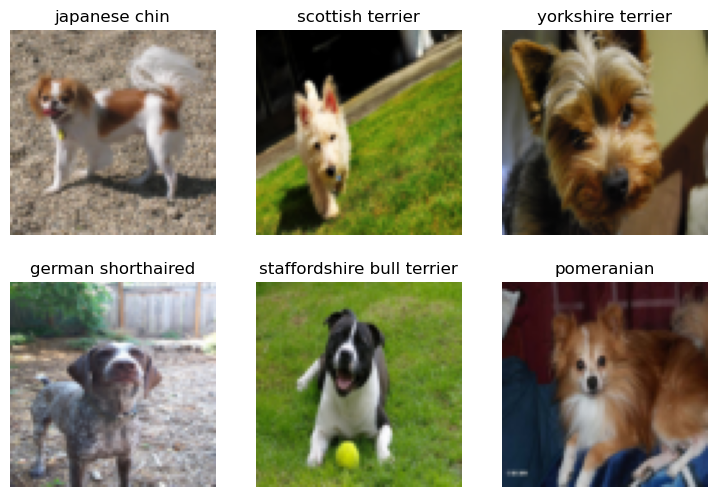

In [9]:
squish_dls.show_batch(max_n=6)

In [10]:
crop_dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2,
    label_func=pet_label_func, item_tfms=[Resize(80, method='crop')])

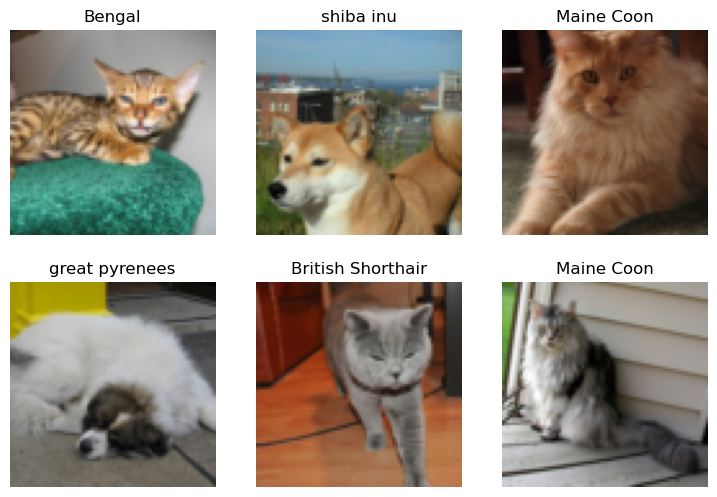

In [11]:
crop_dls.show_batch(max_n=6)

In [12]:
def get_plot_data(dls): 
    model = vision_learner(dls, resnet18, metrics=error_rate, cbs=CSVLogger())
    model.fine_tune(10)
    df = model.csv_logger.read_log() 
    return df

In [13]:
squish = get_plot_data(squish_dls)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,3.748116,2.393924,0.633965,00:59


epoch,train_loss,valid_loss,error_rate,time
0,2.318673,1.913267,0.536536,00:54
1,1.753287,1.637585,0.462111,00:55
2,1.191694,1.629888,0.454668,00:55
3,0.672023,1.613157,0.425575,00:55
4,0.334660,1.728313,0.434371,00:54
5,0.163882,1.754824,0.436401,00:55
6,0.103561,1.795234,0.428281,00:54
7,0.059764,1.798202,0.428281,00:45
8,0.039579,1.786063,0.420162,00:46
9,0.032214,1.767560,0.418809,00:46


In [14]:
crop = get_plot_data(crop_dls)

epoch,train_loss,valid_loss,error_rate,time
0,3.544523,2.150343,0.579161,00:44


epoch,train_loss,valid_loss,error_rate,time
0,2.138658,1.669580,0.474966,00:44
1,1.718346,1.338377,0.393099,00:43
2,1.302020,1.221586,0.359269,00:43
3,0.911685,1.140856,0.326116,00:43
4,0.663068,1.161115,0.326793,00:43
5,0.449947,1.126288,0.309202,00:44
6,0.318100,1.136799,0.308525,00:43
7,0.227021,1.111965,0.298376,00:43
8,0.179985,1.107228,0.292287,00:44
9,0.154336,1.113135,0.292287,00:42


In [15]:
pad = get_plot_data(crop_dls)

epoch,train_loss,valid_loss,error_rate,time
0,3.517123,2.111790,0.573748,00:42


epoch,train_loss,valid_loss,error_rate,time
0,2.195327,1.644080,0.464141,00:43
1,1.714312,1.347274,0.403248,00:42
2,1.292488,1.236703,0.364005,00:42
3,0.940089,1.180346,0.347091,00:43
4,0.670342,1.169014,0.336265,00:42
5,0.461418,1.165491,0.320027,00:42
6,0.310841,1.144423,0.312585,00:43
7,0.235773,1.129336,0.297023,00:42
8,0.186496,1.123066,0.301759,00:42
9,0.155533,1.137617,0.292287,00:43


Text(0.5, 1.0, 'Error rate with different data-augmentations')

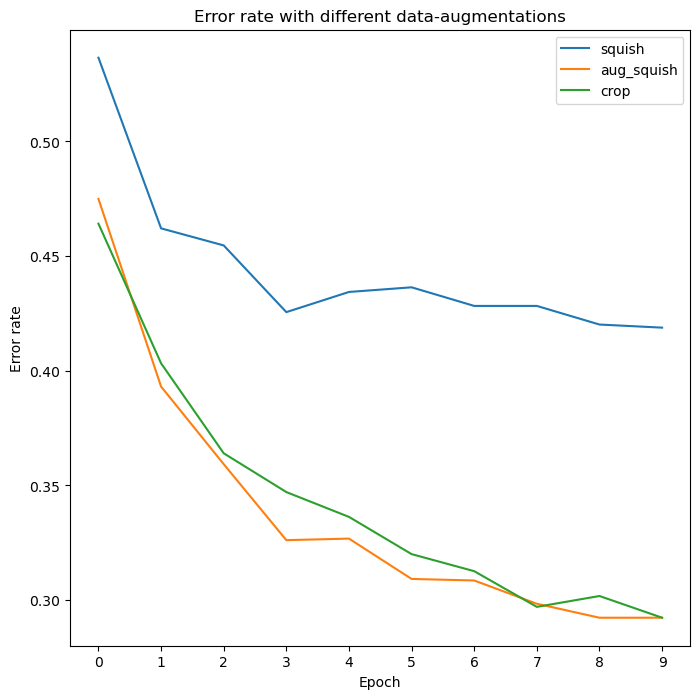

In [16]:
csvs = [squish, crop, pad]
plt.figure(figsize = (8,8))
for i in csvs:
    plt.plot(i['epoch'], i['error_rate'])
    plt.xticks(i['epoch'])

plt.xlabel("Epoch")

plt.ylabel("Error rate")
plt.legend(['squish','aug_squish','crop', 'aug_crop'])

plt.title("Error rate with different data-augmentations")
